## QUESTION 3 : Implement Linear Regression Model to Predict Chances of Admit

### <font color = "blue"> Import Required Modules

In [527]:
import numpy as np
import sys
import math
from tabulate import tabulate
import pprint
import operator
import ipdb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

### <font color = "blue"> Utility to load and clean dataset

In [528]:
def load_preprocess_data(path):
    dataset = pd.read_csv(path)
    dropIndex = [0]
    dataset.drop(dataset.columns[dropIndex],axis=1,inplace=True)
    return dataset

### <font color = "blue"> Utility to split data into training and validation using 80:20 ratio

In [529]:
def split_data(dataset):
#     train_data = dataset.sample(frac=0.8)
#     val_data = dataset.drop(train_data.index)
    train_data, val_data = np.split(dataset, [int(.8*len(dataset))])
    return train_data, val_data

### <font color = "blue">Utility to normalise the dataset features

In [530]:
def normalize(data):
    for i in data.columns[:-2]:
        data[i] = (data[i] - data[i].mean())/data[i].std()
    return data

### <font color = "blue">The Mean Square Error Loss Function

In [531]:
def mean_square(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

### <font color = "blue"> Implementation of Gradient Descent - it is used to minimise the model loss.

In [550]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = mean_square(X, y, theta)
    
    return theta,cost

### <font color = "blue">Utility to set up required matrices for Linear Regression

In [551]:
def setup_matrices(dataset):
    dataset = normalize(dataset)
    train_data, val_data = split_data(dataset)
    val_data.insert(0, 'Ones', 1)
    cols = train_data.shape[1]
    X = train_data.iloc[:, 0 : cols - 1]
    ones = np.ones([X.shape[0], 1])
    X = np.concatenate((ones, X), axis=1)
    y = train_data.iloc[:, cols - 1 : cols].values
    theta = np.zeros([1, 8])
    return X, y, theta, val_data

### <font color = "blue">This function is used for plotting various graphs

In [534]:
def plot_graph(iters, cost_matrix):
    fig, ax = plt.subplots()  
    plt.grid(True)
    ax.plot(np.arange(iters), cost_matrix, 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Cost')  
    ax.set_title('Error vs. Training Epoch') 

### <font color = "blue"> Prediction function for validation or test dataset

In [535]:
def predict(row, theta):
    length = theta.shape[1]
    value = 0
    for i in range(0, length):
        value += theta[0][i] * row[i]
    return value

In [536]:
def data_validation(validate,theta):
    predicted = []
    actual = []
    for index, row in validate.iterrows():
        predicted.append(predict(row, theta))
        actual.append(row[-1])
    return predicted , actual

### <font color = "blue"> This function calculates the  Residual(Error) for each test sample

In [537]:
def residual(predicted , actual):
    return np.array(predicted) - np.array(actual)

### <font color = "blue">Function to plot Residual Errors

In [538]:
def plot_residual(predicted, actual, dataset):
    y = residual(predicted , actual)
    cols = list(dataset)
    for i in range(1,8):
        x = np.array(dataset.iloc[:,i])
        plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
        plt.xlabel(cols[i])
        plt.ylabel(" Residual Error ")
        plt.grid(True)
        plt.scatter(x,y, c='b', label = 'Error rate')
        plt.show()

### <font color = "blue"> Main Function 

In [539]:
def main():
    dataset = load_preprocess_data("./AdmissionDataset/data.csv")
    alpha = 0.01
    iters = 1000
    
    feature_matrix, actual_output, theta, val_data = setup_matrices(dataset)
    final_theta, cost_matrix = gradientDescent(feature_matrix, actual_output, theta, iters, alpha)
    model_error = mean_square(feature_matrix, actual_output, final_theta)
    print("Model Error : ",model_error)
    plot_graph(iters, cost_matrix)
    predicted, actual = data_validation(val_data, final_theta)
    return predicted, actual, val_data

## QUESTION 3 : PART 1 : Implementing a Linear Regression Model

### <font color = "blue">Total Error Incurred by the Regression Model, Cost vs Epoch Plot</font>

Model Error :  0.002391727161203461


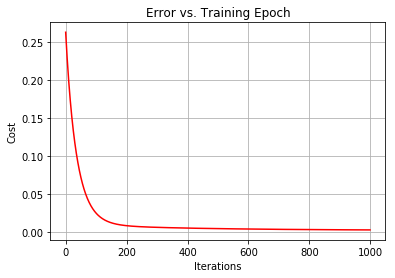

In [540]:
predicted, actual, val_data = main()

In [541]:
def mean_squared_error(predicted , actual):
    return np.mean((np.array(actual) - np.array(predicted))**2)

In [542]:
def mean_absolute_error(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))))

In [543]:
def mean_abs_percent_error(predicted , actual):
    return np.mean(np.abs((np.array(actual) - np.array(predicted))/ np.array(actual))) * 100

In [544]:
def compare_loss_func():
    columns = ['Mean_Squared_Error', 'Mean_Absolute_Error', 'Mean_Absolute_Percent_Error']
    output = pd.DataFrame(columns = columns)
    mse = mean_squared_error(predicted, actual)
    mae = mean_absolute_error(predicted, actual)
    mape = mean_abs_percent_error(predicted, actual)
    output = output.append({'Mean_Squared_Error' : mse, 'Mean_Absolute_Error' : mae, 'Mean_Absolute_Percent_Error' : mape}, ignore_index=True)
    return output

## QUESTION 3 :  PART 2 : Compare Performance Of Error Loss Functions

### <font color = "blue">Observations about various loss functions</font>

### <font color = "blue">Mean Squared Error (MSE)</font>
#### It is perhaps the most simple and common metric for regression evaluation, but also probably the least useful. It is defined by the equation : $MSE= \frac{1}{N}\sum_{i= 1}^{N}\left ( y_{i}\ -\ {y_{i}}' \right )^2$
#### Advantage: Useful if we have unexpected values that we should care about. Vey high or low value that we should pay attention.
#### Disadvantage: If we make a single very bad prediction, the squaring will make the error even worse and it may skew the metric towards overestimating the model’s badness. That is a particularly problematic behaviour if we have noisy data

### <font color = "blue">Mean Absolute Error (MAE)</font>
#### In MAE the error is calculated as an average of absolute differences between the target values and the predictions. The MAE is a linear score which means that all the individual differences are weighted equally in the average. It is calculated as : 
$MSE= \frac{1}{N}\sum_{i= 1}^{N}\left | y_{i}\ -\ {y_{i}}' \right |$
#### Advantage: What is important about this metric is that it penalizes huge errors that not as that badly as MSE does. Thus, it’s not that sensitive to outliers as mean square error.
#### Another important thing about MAE is its gradients with respect to the predictions.The gradiend is a step function and it takes -1 when Y' is smaller than the target and +1 when it is larger.

### <font color = "blue">Mean Absolute Percentage Error (MAPE)</font>
#### The mean absolute percentage error (MAPE) is also often useful for purposes of reporting, because it is expressed in generic percentage terms which will make some kind of sense even to someone who has no idea what constitutes a "big" error in terms of dollars spent or widgets sold. The MAPE can only be computed with respect to data that are guaranteed to be strictly positive, so if this statistic is missing from your output where you would normally expect to see it, it’s possible that it has been suppressed due to negative data values.
#### $MAPE= \frac{1}{N}\sum_{i= 1}^{N}\left ( \frac{\left | y_{i}\ -\ {y_{i}}' \right |}{y_{i}} \right )\ast 100$

In [545]:
compare_loss_func()

,Mean_Squared_Error,Mean_Absolute_Error,Mean_Absolute_Percent_Error
0,0.005187,0.053011,8.322492


## QUESTION 3 : PART 3 : Analyzing The Behaviour of Coefficients
### <font color = "blue"> Residuals Plots 

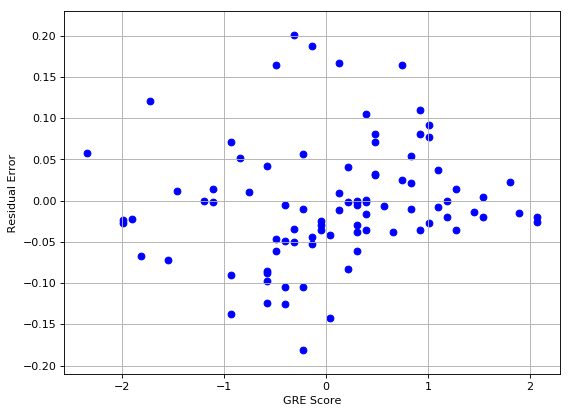

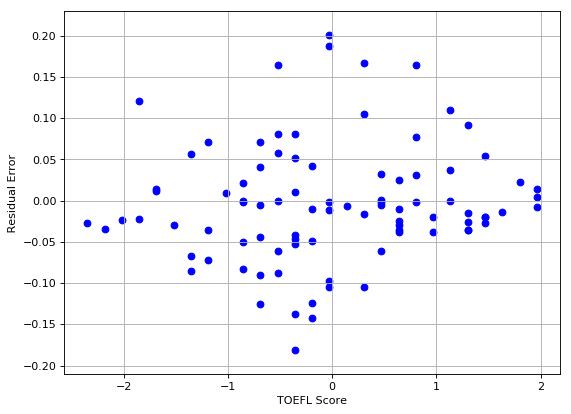

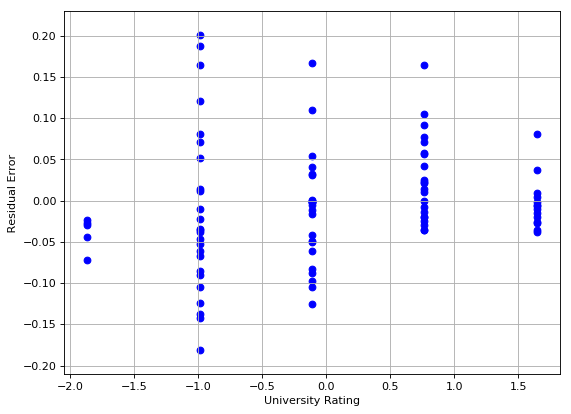

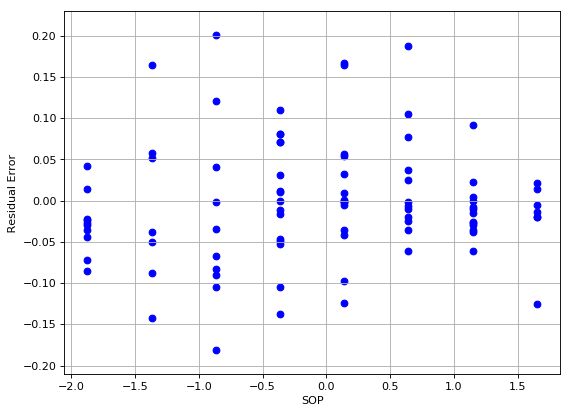

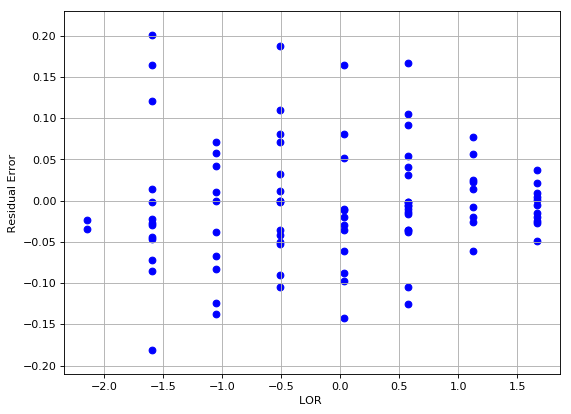

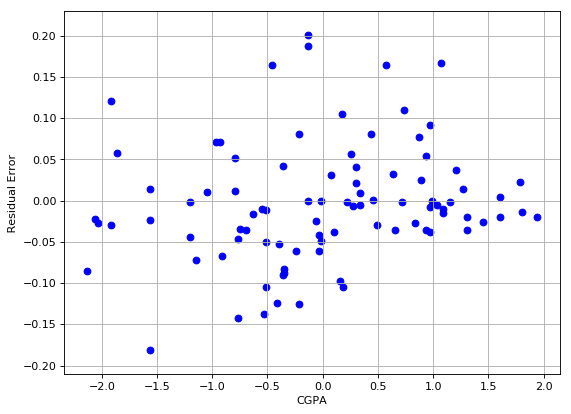

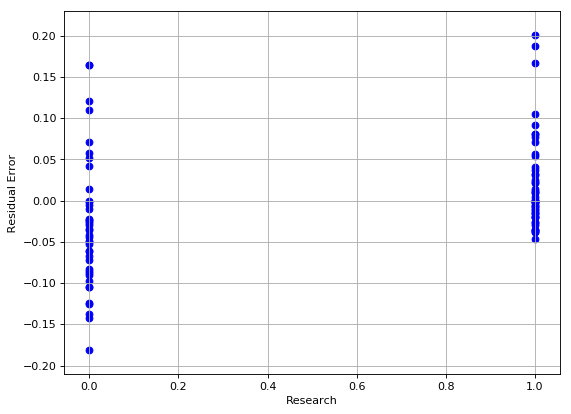

In [546]:
plot_residual(predicted, actual, val_data)

### <h1 font color = "blue" align = "center"> *********** THE END *************** </font>